In [5]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [6]:
def Helmholtz_free_energy(beta):
    """
    Argument: Inverse temperature beta=1/T
    Returns: Exact Helmholtz_free_energy per side
    https://en.wikipedia.org/wiki/Square_lattice_Ising_model
    https://arxiv.org/abs/cond-mat/9511003
    """

    def f(x):

        k=(2*np.sinh(2*beta)/(np.cosh(2*beta)**2))
        return (1/(2*np.pi))*np.log(0.5*(1 +np.sqrt(1-(k**2)*np.sin(x)**2)))

    a=0
    b= np.pi
    
    result_quad, error = quad(f, a, b)

    return np.log(2*np.cosh(2*beta))+result_quad

def U_exact(beta, J):
    """
    Arguments: 
    beta inverse temperature (1/T),J coupling in Ising model
    Returns:
    Internal energy per site
    https://en.wikipedia.org/wiki/Square_lattice_Ising_model
    """
    def g(x):
        k=(1/(np.sinh(2*beta)**2))
        return 1/(np.sqrt(1-4*k*((1+k)**(-2))*np.sin(x)**2))

    a=0
    b= np.pi/2
    Integral, error=quad(g, a, b)

    U=-J*(np.cosh(2*beta*J)/np.sinh(2*beta*J))*(1+(2/np.pi)*(-1+2*np.tanh(2*beta*J)**2)*Integral)

    return U 

def M_exact(beta,J):
    """
    Arguments: 
    beta inverse temperature (1/T),J coupling in Ising model
    Returns:
    Exact solution for magnetization per side
    https://en.wikipedia.org/wiki/Square_lattice_Ising_model
    """

    M=(1-np.sinh(2*beta*J)**(-4))**(1/8)
    return M

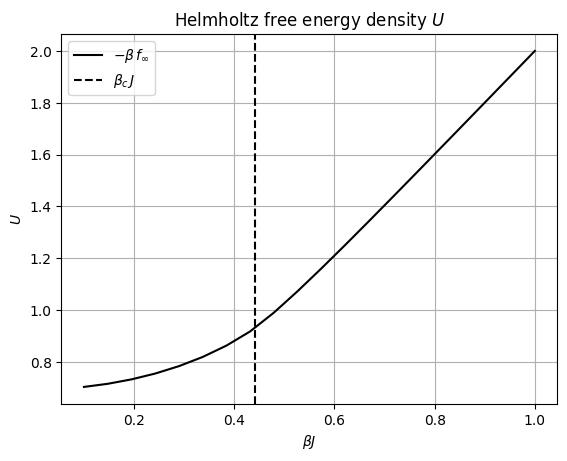

In [7]:
T_crit=2.26918531421

beta_list=np.linspace(0.1,1,20)
y=[Helmholtz_free_energy(x) for x in beta_list ]

plt.plot(beta_list, y,color='black', label=r'$-\beta \,f_{\infty}$')

# Adding a vertical line
beta_c = 1/T_crit  # critical beta
plt.axvline(x=beta_c, color='black', linestyle='--', label=r'$\beta_c \,J$')

# Add labels and a legend
plt.xlabel(r'$\beta J$')
plt.ylabel(r'$U$')
plt.title(r'Helmholtz free energy density $U$')
plt.legend()

plt.grid(True) 

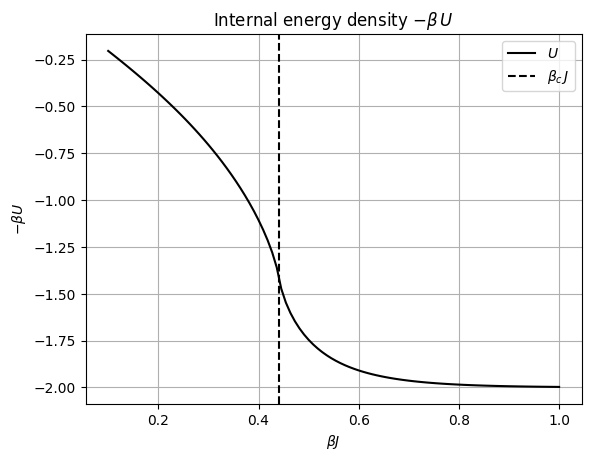

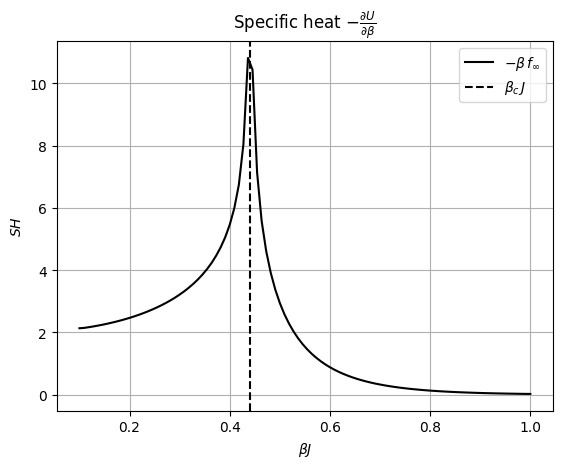

In [9]:
T_crit=2.26918531421
J=1
N=100
a=0.1
b=1
eps=(b-a)/N
beta_list=np.linspace(0.1,1,N)
y=[U_exact(x,J) for x in beta_list]

plt.figure()
plt.plot(beta_list, y,color='black', label=r'$U$')

# Adding a vertical line
beta_c = 1/T_crit  # critical beta
plt.axvline(x=beta_c, color='black', linestyle='--', label=r'$\beta_c \,J$')

# Add labels and a legend
plt.xlabel(r'$\beta J$')
plt.ylabel(r'$-\beta U$')
plt.title(r'Internal energy density $-\beta \, U$')
plt.legend()

plt.grid(True) 

plt.figure()
y=-np.gradient(y,eps)
plt.plot(beta_list, y,color='black', label=r'$-\beta \,f_{\infty}$')

# Adding a vertical line
beta_c = 1/T_crit  # critical beta
plt.axvline(x=beta_c, color='black', linestyle='--', label=r'$\beta_c \,J$')

# Add labels and a legend
plt.xlabel(r'$\beta J$')
plt.ylabel(r'$SH$')
plt.title(r'Specific heat $-\frac{\partial U}{\partial \beta} $')
plt.legend()

plt.grid(True) 

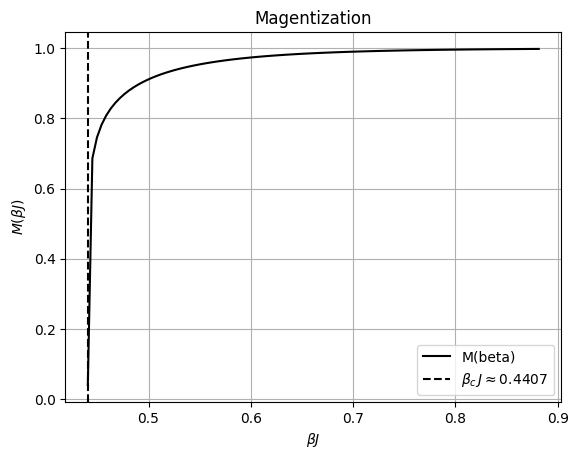

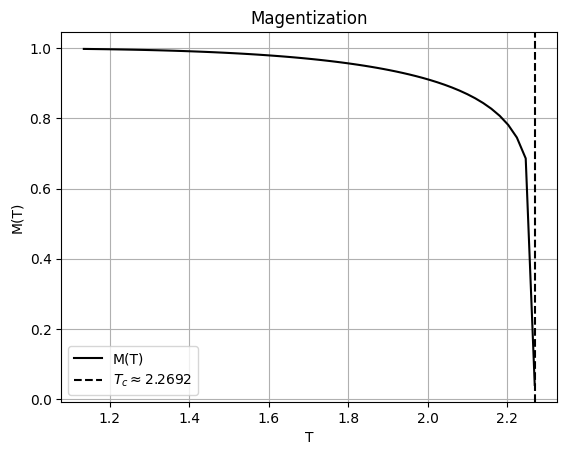

In [10]:
J=1
T_crit=2.26918531421
beta_min=1/(T_crit*J)
N=100

beta_list=np.linspace(beta_min,2*beta_min,N)    
y=[M_exact(x,J) for x in beta_list]
plt.figure()
plt.plot(beta_list, y,color='black' ,label='M(beta)')

# Add labels and a legend
plt.xlabel(r'$\beta J$')
plt.ylabel(r'$M(\beta J)$')
plt.title('Magentization')

beta_c = 1/T_crit  # critical beta
plt.axvline(x=beta_c, color='black', linestyle='--', label=r'$\beta_c \,J\approx$'+str(round(beta_c, 4) ))

plt.legend()
plt.grid(True) 


plt.figure()
x=[1/T for T in beta_list]
plt.plot(x, y,color='black' ,label='M(T)')

# Add labels and a legend
plt.xlabel('T')
plt.ylabel('M(T)')
plt.title('Magentization')
    
plt.axvline(x=T_crit, color='black', linestyle='--', label=r'$T_c\approx$'+str(round(T_crit,4)))
    
plt.legend()
plt.grid(True) 